In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()
sns.set_color_codes('deep')

# Data sets

On va importer les différents fichiers et faire une première analyse des variables

## Customers

Fichier clients contenant des informations sur les clients. La valeur de `customer_id` diffère pour chaque commande et celle de `customer_unique_id` est propre à chaque client.

In [2]:
df_customers = pd.read_csv('data/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
df_customers.shape

(99441, 5)

In [4]:
df_customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

In [5]:
# Nombre de valeurs uniques par variable
for col in df_customers.columns:
    print(f'{col :-<50} {df_customers[col].unique().size}')

customer_id--------------------------------------- 99441
customer_unique_id-------------------------------- 96096
customer_zip_code_prefix-------------------------- 14994
customer_city------------------------------------- 4119
customer_state------------------------------------ 27


In [6]:
# Série contenant les clients ayant fait plusieurs commandes avec l'id unique en indice
# et le nombre de commandes en valeur
repeated_df_customers = df_customers['customer_unique_id'].value_counts()
repeated_df_customers = repeated_df_customers[repeated_df_customers > 1]
repeated_df_customers

8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
6469f99c1f9dfae7733b25662e7f1782     7
                                    ..
370cd3b09ea745fe047fd11db7430441     2
d7c6bdf20c4ec9c9cda815dde58e778a     2
a366793a4999f8cc135855c4dd347421     2
156283b6ca35ef976a0265903145fd5e     2
d83257348027bd8c59a228cc034de5e3     2
Name: customer_unique_id, Length: 2997, dtype: int64

In [7]:
# Nombre de clients ayant fait plusieurs commandes
repeated_df_customers.size

2997

In [8]:
df_customers.isna().mean()

customer_id                 0.0
customer_unique_id          0.0
customer_zip_code_prefix    0.0
customer_city               0.0
customer_state              0.0
dtype: float64

## Geolocation

In [9]:
geolocation = pd.read_csv('data/olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [10]:
geolocation.shape

(1000163, 5)

In [11]:
geolocation.isna().mean()

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

## Items

Fichier des articles achetés par les clients. La colonne `order_item_id` contient le rang de l'article dans la commande (une commande pouvant contenir plusieurs articles)

In [12]:
items = pd.read_csv('data/olist_order_items_dataset.csv')
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [13]:
items.shape

(112650, 7)

In [14]:
items.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [15]:
# Nombre de valeurs uniques par variable
for col in items.columns:
    print(f'{col :-<50} {items[col].unique().size}')

order_id------------------------------------------ 98666
order_item_id------------------------------------- 21
product_id---------------------------------------- 32951
seller_id----------------------------------------- 3095
shipping_limit_date------------------------------- 93318
price--------------------------------------------- 5968
freight_value------------------------------------- 6999


La variable `order_item_id` désigne l'ordre de l'article dans la commande, donc pour chaque valeur de `order_item_id` toutes les valeurs de `order_id` correspondantes sont différentes :

In [16]:
for i in range(items['order_item_id'].unique().size):
    print(items.loc[items['order_item_id'] == i, 'order_id'].duplicated().sum())

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [17]:
items.isna().mean()

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

## Reviews

Ficher contenant les avis des clients

In [18]:
reviews = pd.read_csv('data/olist_order_reviews_dataset.csv')
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
reviews.shape

(99224, 7)

In [20]:
reviews.dtypes

review_id                  object
order_id                   object
review_score                int64
review_comment_title       object
review_comment_message     object
review_creation_date       object
review_answer_timestamp    object
dtype: object

In [21]:
for col in reviews.columns:
    print(f'{col :-<50} {reviews[col].unique().size}')

review_id----------------------------------------- 98410
order_id------------------------------------------ 98673
review_score-------------------------------------- 5
review_comment_title------------------------------ 4528
review_comment_message---------------------------- 36160
review_creation_date------------------------------ 636
review_answer_timestamp--------------------------- 98248


In [22]:
reviews.isna().mean()

review_id                  0.000000
order_id                   0.000000
review_score               0.000000
review_comment_title       0.883415
review_comment_message     0.587025
review_creation_date       0.000000
review_answer_timestamp    0.000000
dtype: float64

## Orders

Fichier des commandes

In [23]:
orders = pd.read_csv('data/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [24]:
orders.shape

(99441, 8)

In [25]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [26]:
for col in orders.columns:
    print(f'{col :-<50} {orders[col].unique().size}')

order_id------------------------------------------ 99441
customer_id--------------------------------------- 99441
order_status-------------------------------------- 8
order_purchase_timestamp-------------------------- 98875
order_approved_at--------------------------------- 90734
order_delivered_carrier_date---------------------- 81019
order_delivered_customer_date--------------------- 95665
order_estimated_delivery_date--------------------- 459


Le nombre de valeurs uniques de `order_purchase_timestamp` est inférieure au nombre de lignes, il y a donc des commandes différentes qui ont été passées exactement au même instant

In [27]:
orders.duplicated(subset='order_purchase_timestamp').sum()

566

In [28]:
orders.isna().mean()

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.001609
order_delivered_carrier_date     0.017930
order_delivered_customer_date    0.029817
order_estimated_delivery_date    0.000000
dtype: float64

## Products

Fichier des produits mis en vente

In [29]:
products = pd.read_csv('data/olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [30]:
products.shape

(32951, 9)

In [31]:
products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

In [32]:
for col in products.columns:
    print(f'{col :-<50} {products[col].unique().size}')

product_id---------------------------------------- 32951
product_category_name----------------------------- 74
product_name_lenght------------------------------- 67
product_description_lenght------------------------ 2961
product_photos_qty-------------------------------- 20
product_weight_g---------------------------------- 2205
product_length_cm--------------------------------- 100
product_height_cm--------------------------------- 103
product_width_cm---------------------------------- 96


In [33]:
products.isna().mean()

product_id                    0.000000
product_category_name         0.018512
product_name_lenght           0.018512
product_description_lenght    0.018512
product_photos_qty            0.018512
product_weight_g              0.000061
product_length_cm             0.000061
product_height_cm             0.000061
product_width_cm              0.000061
dtype: float64

## Sellers

Fichier des vendeurs

In [34]:
sellers = pd.read_csv('data/olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [35]:
sellers.shape

(3095, 4)

In [36]:
sellers.dtypes

seller_id                 object
seller_zip_code_prefix     int64
seller_city               object
seller_state              object
dtype: object

In [37]:
for col in sellers.columns:
    print(f'{col :-<50} {sellers[col].unique().size}')

seller_id----------------------------------------- 3095
seller_zip_code_prefix---------------------------- 2246
seller_city--------------------------------------- 611
seller_state-------------------------------------- 23


In [38]:
sellers.isna().mean()

seller_id                 0.0
seller_zip_code_prefix    0.0
seller_city               0.0
seller_state              0.0
dtype: float64

## Category name translation

Fichier contenant la traduction anglaise des noms des catégories de produit

In [39]:
translation = pd.read_csv('data/product_category_name_translation.csv')
translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [40]:
translation.shape

(71, 2)

Produits présents dans `products` mais pas dans `translation`

In [41]:
mask = products['product_category_name'].isin(translation['product_category_name'])
products.loc[~mask, 'product_category_name'].unique()

array([nan, 'pc_gamer', 'portateis_cozinha_e_preparadores_de_alimentos'],
      dtype=object)

# Analyse de fond

## Élimination des colonnes inutiles

In [42]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [43]:
df_customers = df_customers.drop(columns=['customer_zip_code_prefix', 'customer_city', 'customer_state'])

In [44]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [45]:
items = items.drop(columns='shipping_limit_date')

In [46]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [47]:
reviews = reviews.drop(columns=['review_comment_title', 'review_comment_message', 'review_creation_date',
                                'review_answer_timestamp'])

In [48]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [49]:
orders = orders.drop(columns=['order_approved_at', 'order_delivered_carrier_date'])

In [50]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [51]:
products = products.drop(columns=['product_name_lenght', 'product_description_lenght', 
                                  'product_photos_qty', 'product_weight_g', 'product_length_cm', 
                                  'product_height_cm', 'product_width_cm'])

## Jointure des dataframes

On commence par remplacer les noms des catégories par leurs noms anglais

In [52]:
df = pd.merge(products, translation, how='left')

mask1 = df['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos'
df.loc[mask1, 'product_category_name_english'] = 'portable_kitchen_and_food_preparation'
mask2 = df['product_category_name'] == 'pc_gamer'
df.loc[mask2, 'product_category_name_english'] = 'pc_gamer'

products = df.drop(columns='product_category_name')

On n'utilisera pas les données sur la géolocalisation et les vendeurs

In [53]:
# On regroupe les données dans le DataFrame `df`
df = pd.merge(df_customers, orders, on='customer_id', how='inner')
df = pd.merge(df, items, on='order_id', how='left')
df = pd.merge(df, reviews, on='order_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
df.shape

(114092, 15)

In [54]:
# Status des commandes
df['order_status'].value_counts()

delivered      110840
shipped          1197
canceled          711
unavailable       612
invoiced          366
processing        358
created             5
approved            3
Name: order_status, dtype: int64

On ne garde que les commandes qui ont été livrées puis on supprime la colonne `order_status`

In [55]:
df = df[df['order_status'] == 'delivered']
df = df.drop(columns='order_status')
df.shape

(110840, 14)

Regardons le nombre de valeurs manquantes par colonne

In [56]:
df.isna().sum()

customer_id                         0
customer_unique_id                  0
order_id                            0
order_purchase_timestamp            0
order_delivered_customer_date       8
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
review_id                         827
review_score                      827
product_category_name_english    1545
dtype: int64

Comme on a > 100k lignes, on peut se permettre d'éliminer les valeurs manquantes

In [57]:
df = df.dropna()
df.shape

(108472, 14)

On supprime les id sauf l'id unique client

In [58]:
df = df.drop(columns=['customer_id', 'product_id', 'seller_id', 'review_id'])
df.shape

(108472, 10)

In [59]:
df.isna().sum().sum()

0

On enlève les commandes dont on a éliminé une partie des articles par les opérations précédentes

In [60]:
incomplete_orders = df[['order_id', 'order_item_id']].groupby('order_id').min()
incomplete_orders = incomplete_orders[incomplete_orders['order_item_id'] > 1]
incomplete_orders = incomplete_orders.index
incomplete_orders

Index(['0b01066982af6f2681ea9b0169f0d987', '0ca8999f0176e37f35b6e49a9b2569da',
       '1272198ea0829564b49fe8bb6ad3ea27', '15a1cd1da2bcaccc711512ecb5701c5d',
       '23f098e532da469bf9f45d52c5d16d10', '28f0558838bcded1adf9bd48f1bdc457',
       '293f1f31a342e210ff008a393e2955bd', '31ee7866f7203208e59eba90498ead4c',
       '35575d651196f286d8d73c2b92653aa1', '4ca4a1922b582950b25cce6e7ef34315',
       '5a45e21be984a22a54a63a7e950c2f0e', '5bd04e944fbdeb94cb04e86654501cfb',
       '5f9d46795c3126674e52becb3a1a517f', '626f6424e635c6341bfddf7d53bf3746',
       '669d4be1c2a2cab7e5ec040bf54c5d91', '824abb0e495f59750ecceff64e86459c',
       '9b2fa9acfe395734a133a58bcbfb9776', '9f5054bd9a3c71702aa0917a7da29193',
       'a908872306574c9405b29a838aee5521', 'c8897b5891a3195ee9cecf410341b589',
       'cd9ef363164449df0bf374f87fa1b1de', 'd2cbe14a29b243f01171170540ddc94d',
       'dffe3c3fdb38dd7ca56eb98408730378', 'e6b23db78d4473c921fb9315e04b5c0f',
       'e6e7ffc09203a472e7a298a12281363d', 'f89be3ed

In [61]:
df = df[~df['order_id'].isin(incomplete_orders)]
df.shape

(108435, 10)

In [62]:
df['order_id'].unique().size

94474

In [63]:
df[df['order_item_id'] == 1].shape

(94995, 10)

On voit que le nombre d'id commande est différent du nombre de commandes contenant au moins 1 article (donc le nombre de commandes). Il y a donc des doublons

In [64]:
mask = df.duplicated('order_id') & (df['order_item_id'] == 1) # doublons
df[mask]

,customer_unique_id,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,review_score,product_category_name_english
496,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,1.0,36.99,11.85,5.0,bed_bath_table
597,63df651d5e8adb6a0e4baeb66a0eea37,bbf6a647ecc68aa5e79d2cd75ef44c68,2017-09-01 10:33:16,2017-09-13 18:53:49,2017-09-22 00:00:00,1.0,34.99,11.85,5.0,health_beauty
713,78c5f76b60a3a2588635aadc70e34df7,b45d11b61c2a68756bbbd7665d67e812,2017-10-11 21:55:04,2017-10-19 19:18:47,2017-11-03 00:00:00,1.0,89.99,16.39,5.0,health_beauty
768,00cc12a6d8b578b8ebd21ea4e2ae8b27,d61b915b69851aec8a8865f36cfd793e,2017-03-21 19:25:23,2017-03-28 14:54:11,2017-04-07 00:00:00,1.0,69.90,11.88,3.0,bed_bath_table
835,13613cae6e3bfea8327a916246c96cc9,0176a6846bcb3b0d3aa3116a9a768597,2017-12-25 10:40:52,2017-12-29 21:22:35,2018-01-15 00:00:00,1.0,45.90,7.78,5.0,sports_leisure
...,...,...,...,...,...,...,...,...,...,...
112553,ba77e9b6506636dcbd03e463d4786f24,142b0e3de54c110a3109b26c79d6ec2e,2017-07-02 20:47:23,2017-07-11 17:44:52,2017-08-01 00:00:00,1.0,56.99,15.15,5.0,perfumery
113092,cc14ea7099959d91a17c9d7c3a46721d,e1f693a7777b9f6ff730a9d2b45a56cb,2017-05-12 10:28:31,2017-05-26 14:04:40,2017-06-06 00:00:00,1.0,78.00,21.04,5.0,auto
113600,5ffbc70da7ad1808b6899421caa84fbe,677cebcf344bca22b07250e7548bd8bc,2017-05-01 18:11:52,2017-05-23 15:22:26,2017-06-12 00:00:00,1.0,12.02,22.28,4.0,housewares
113887,8c21dd8c37144807c601f99f2a209dfb,157de1652c032429a625d034be79eeeb,2017-05-10 09:00:07,2017-05-22 16:47:57,2017-06-01 00:00:00,1.0,24.99,14.10,5.0,fashion_sport


In [65]:
# Exemple de commande présentant des doublons
df[df['order_id'] == 'c27cd942c2a926d25153090afa106ceb']

,customer_unique_id,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,price,freight_value,review_score,product_category_name_english
495,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,1.0,36.99,11.85,5.0,bed_bath_table
496,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,1.0,36.99,11.85,5.0,bed_bath_table
497,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,2.0,36.99,11.85,5.0,bed_bath_table
498,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,2.0,36.99,11.85,5.0,bed_bath_table
499,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,3.0,36.99,11.85,5.0,bed_bath_table
500,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,3.0,36.99,11.85,5.0,bed_bath_table
501,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,4.0,47.99,11.85,5.0,bed_bath_table
502,b09f1bff1aff13c997af071602bc048b,c27cd942c2a926d25153090afa106ceb,2017-06-15 14:26:01,2017-06-26 11:23:32,2017-07-10 00:00:00,4.0,47.99,11.85,5.0,bed_bath_table


## Doublons

On va supprimer les doublons

In [66]:
subset = ['customer_unique_id', 'order_id',
       'order_purchase_timestamp', 'order_delivered_customer_date',
       'order_item_id', 'price',
       'freight_value',
       ]
df = df.drop_duplicates(subset=subset)

In [67]:
df['order_id'].unique().size

94474

In [68]:
df[df['order_item_id'] == 1].shape[0]

94474

In [69]:
df.shape

(107800, 10)

# Variables temporelles

On commence par changer le type des variables temporelles

In [70]:
columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in columns:
    df[col] = pd.to_datetime(df[col])
    # On supprime l'heure et ne garde que la date
    df[col] = pd.to_datetime(df[col].dt.date)

In [71]:
df.dtypes

customer_unique_id                       object
order_id                                 object
order_purchase_timestamp         datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
price                                   float64
freight_value                           float64
review_score                            float64
product_category_name_english            object
dtype: object

On va maintenant créer des nouvelles variables à partir des variables temporelles. On va notamment créer des variables correspondant à des délais plutôt que des dates

In [72]:
# Différence entre la date de livraison et la date estimée
df['delivered_estimated_interval'] = df['order_delivered_customer_date'] - df['order_estimated_delivery_date']

# On supprime les variables temporelles dont on n'a plus besoin
df = df.drop(columns=['order_delivered_customer_date', 'order_estimated_delivery_date'])
df.head()

,customer_unique_id,order_id,order_purchase_timestamp,order_item_id,price,freight_value,review_score,product_category_name_english,delivered_estimated_interval
0,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16,1.0,124.99,21.88,4.0,office_furniture,-11 days
1,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12,1.0,289.00,46.48,5.0,housewares,-8 days
2,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19,1.0,139.94,17.79,5.0,office_furniture,1 days
3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13,1.0,149.94,23.36,5.0,office_furniture,-13 days
4,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29,1.0,230.00,22.25,5.0,home_confort,-6 days


In [73]:
df.shape

(107800, 9)

On modifie l'ordre des colonnes

In [74]:
df = df[['order_id', 'customer_unique_id',
         'order_item_id',
         'order_purchase_timestamp', 'delivered_estimated_interval',
         'price', 'freight_value', 'product_category_name_english',
         'review_score']]

In [75]:
df.head()

,order_id,customer_unique_id,order_item_id,order_purchase_timestamp,delivered_estimated_interval,price,freight_value,product_category_name_english,review_score
0,00e7ee1b050b8499577073aeb2a297a1,861eff4711a542e4b93843c6dd7febb0,1.0,2017-05-16,-11 days,124.99,21.88,office_furniture,4.0
1,29150127e6685892b6eab3eec79f59c7,290c77bc529b7ac935b93aa66c333dc3,1.0,2018-01-12,-8 days,289.00,46.48,housewares,5.0
2,b2059ed67ce144a36e2aa97d2c9e9ad2,060e732b5b29e8181a18229c7b0b2b5e,1.0,2018-05-19,1 days,139.94,17.79,office_furniture,5.0
3,951670f92359f4fe4a63112aa7306eba,259dac757896d24d7702b9acbbff3f3c,1.0,2018-03-13,-13 days,149.94,23.36,office_furniture,5.0
4,6b7d50bd145f6fc7f33cebabd7e49d0f,345ecd01c38d18a9036ed96c73b8d066,1.0,2018-07-29,-6 days,230.00,22.25,home_confort,5.0


# Visualisation des données

## Changement de type

In [76]:
df['order_item_id'] = df['order_item_id'].astype('int')
df['review_score'] = df['review_score'].astype('int')
#df['customer_zip_code_prefix'] = df['customer_zip_code_prefix'].astype('object')

In [77]:
df.dtypes

order_id                                  object
customer_unique_id                        object
order_item_id                              int64
order_purchase_timestamp          datetime64[ns]
delivered_estimated_interval     timedelta64[ns]
price                                    float64
freight_value                            float64
product_category_name_english             object
review_score                               int64
dtype: object

## Variables continues

Visualisation des variables continues en échelle linéaire

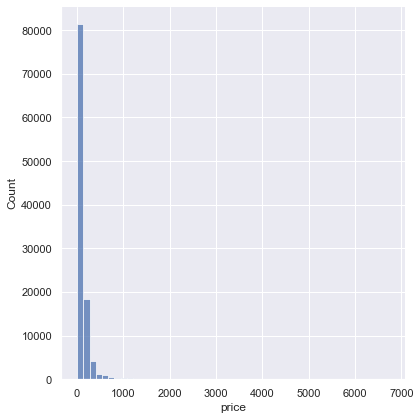

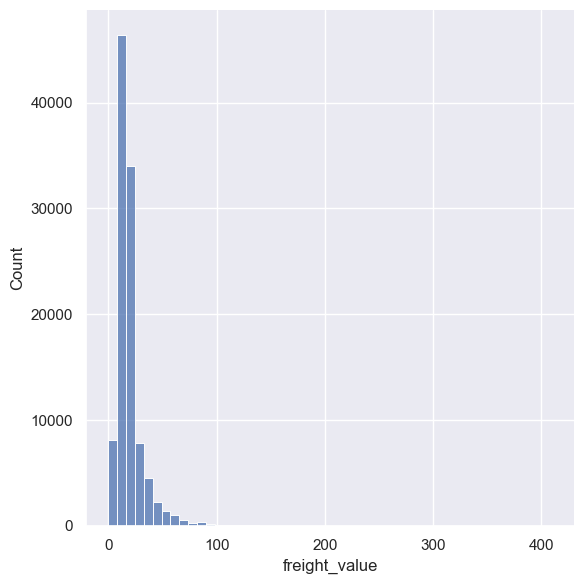

In [78]:
for col in df.select_dtypes('float'):
    sns.displot(x=df[col], bins=50, height=6)

Même chose en échelle log

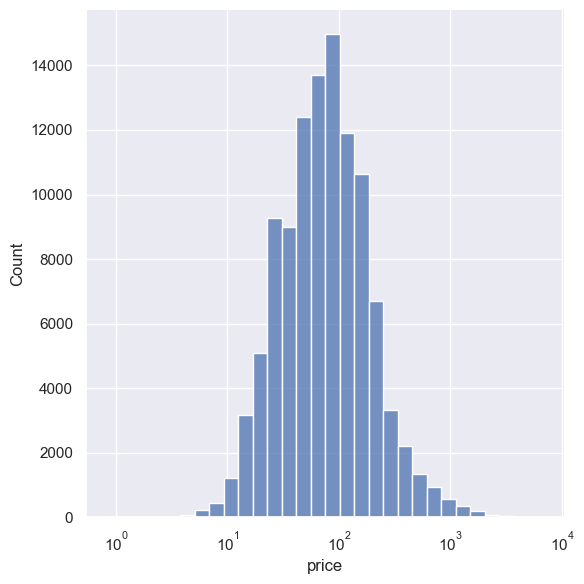

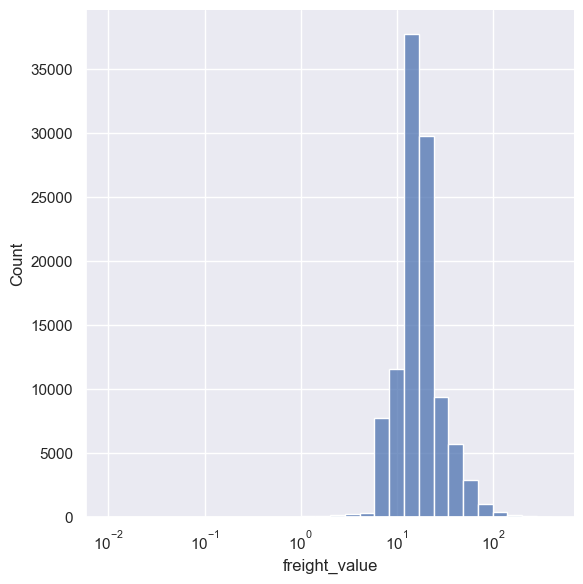

In [79]:
for col in df.select_dtypes('float'):
    sns.displot(x=df.loc[df[col]>0, col], bins=30, log_scale=True, height=6)

## Variables entières

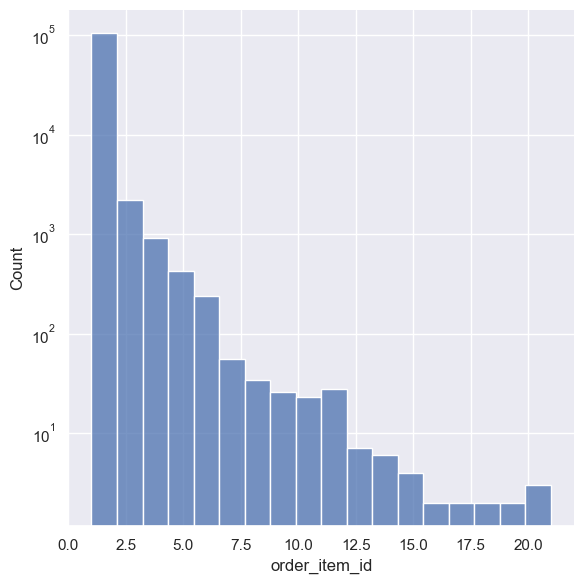

In [80]:
sns.displot(x=df['order_item_id'], log_scale=(False, True), height=6);

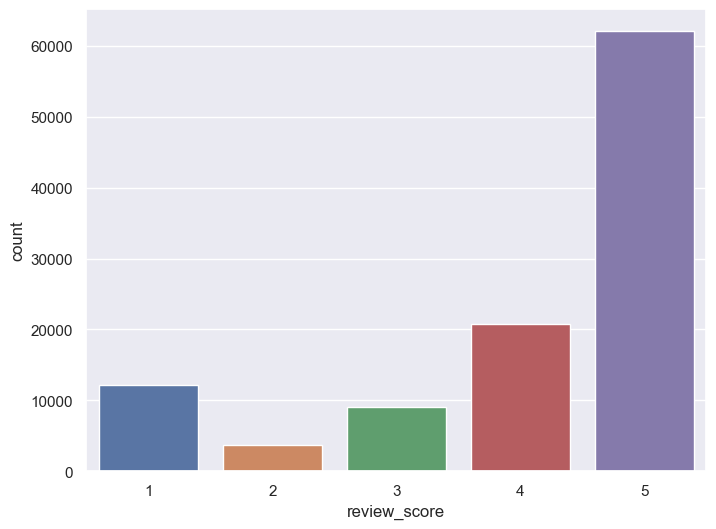

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['review_score'].dropna());

## Dates

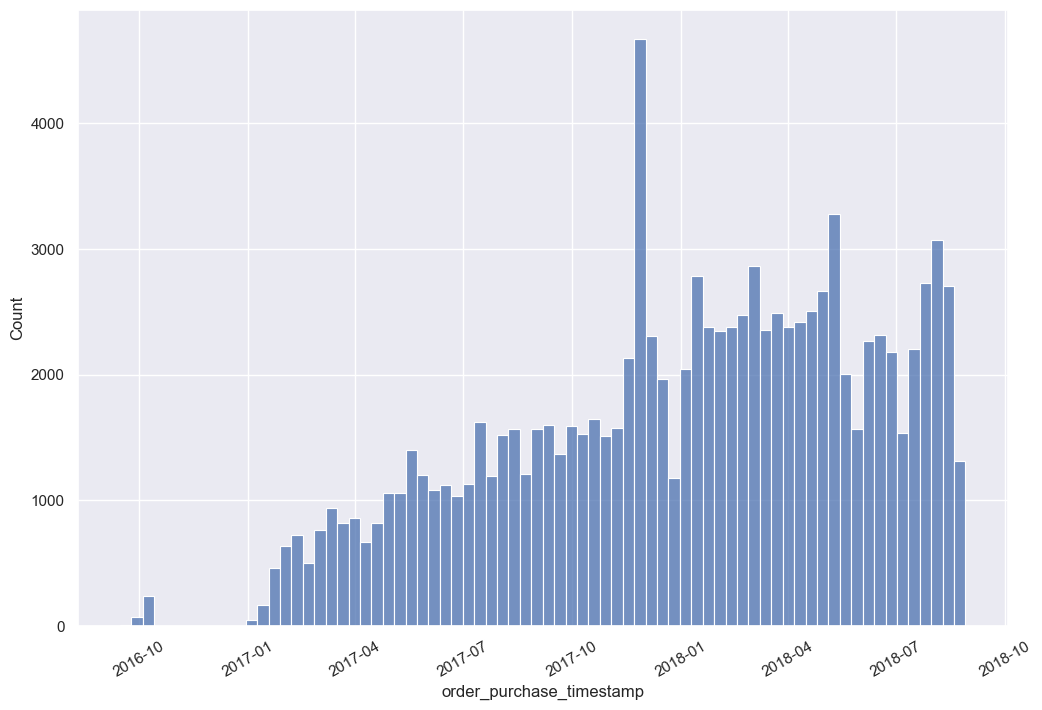

In [82]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['order_purchase_timestamp'])
plt.xticks(rotation=30);

On voit qu'il y a une discontinuité entre fin 2016 et début 2017, on va donc supprimer les commandes datant d'avant 2017

In [83]:
df = df[df['order_purchase_timestamp'].dt.year >= 2017]
df.shape

(107489, 9)

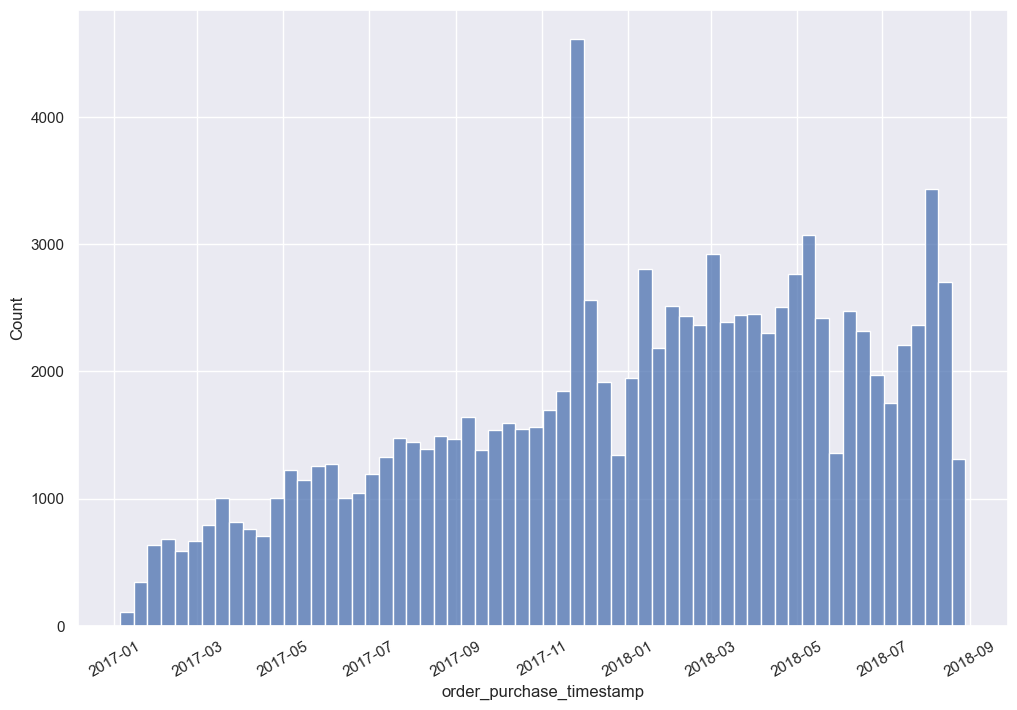

In [84]:
plt.figure(figsize=(12,8))
sns.histplot(x=df['order_purchase_timestamp'])
plt.xticks(rotation=30);

Distribution des dates d'achat en fonction du mois de l'année

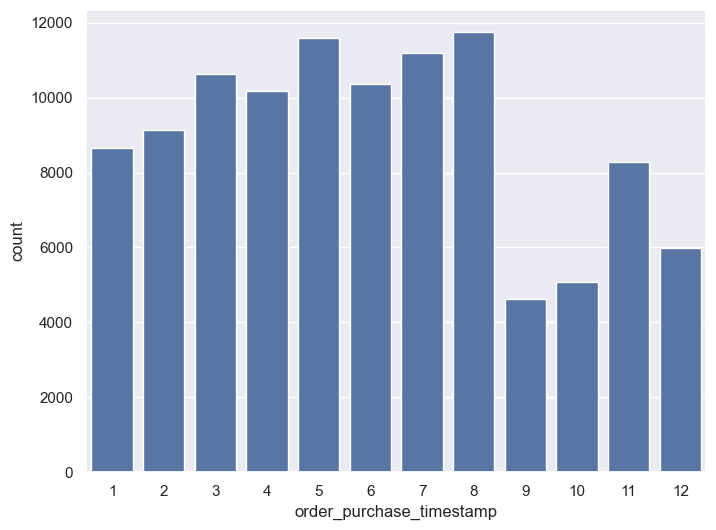

In [85]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['order_purchase_timestamp'].dt.month, color='b');

Distribution des dates d'achat en fonction du jour du mois

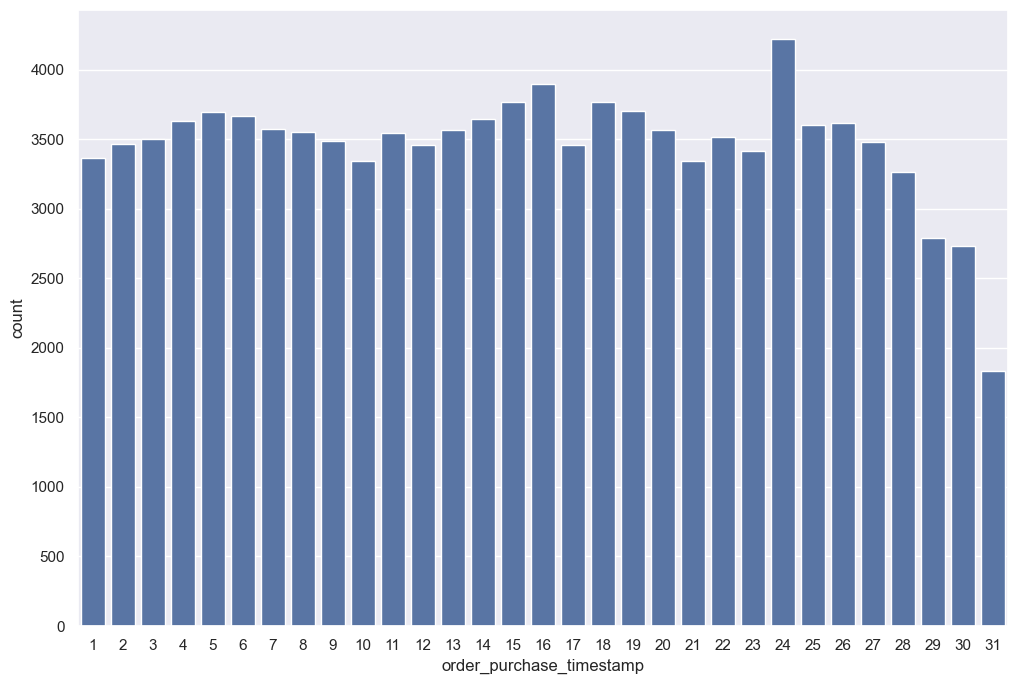

In [86]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['order_purchase_timestamp'].dt.day, color='b');

Distribution des dates d'achat en fonction du jour de la semaine

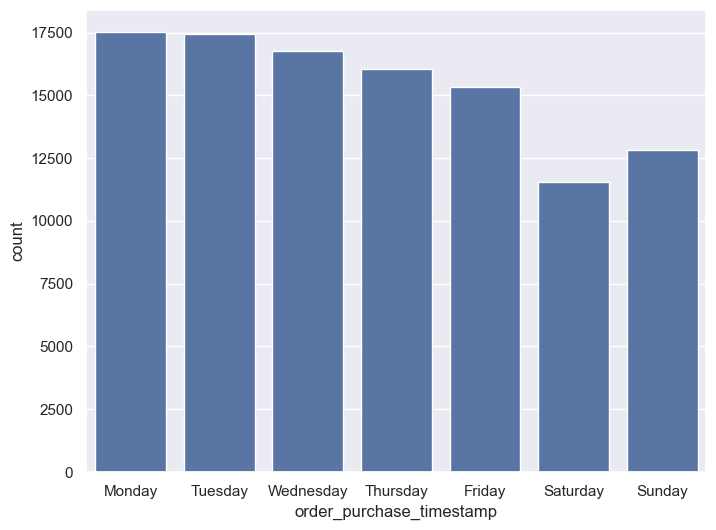

In [87]:
plt.figure(figsize=(8,6))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x=df['order_purchase_timestamp'].dt.day_name(), order=order, color='b');

Distribution des retards de livraison (la commande a été livrée en avance si la valeur est négative)

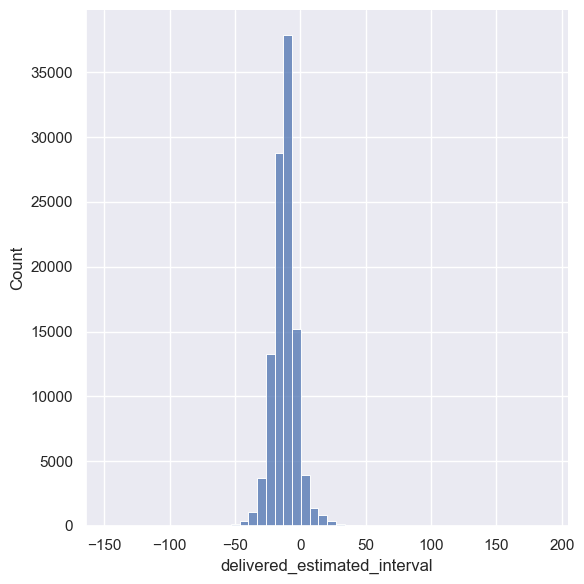

In [88]:
sns.displot(x=df['delivered_estimated_interval'].dt.days, bins=50, height=6);

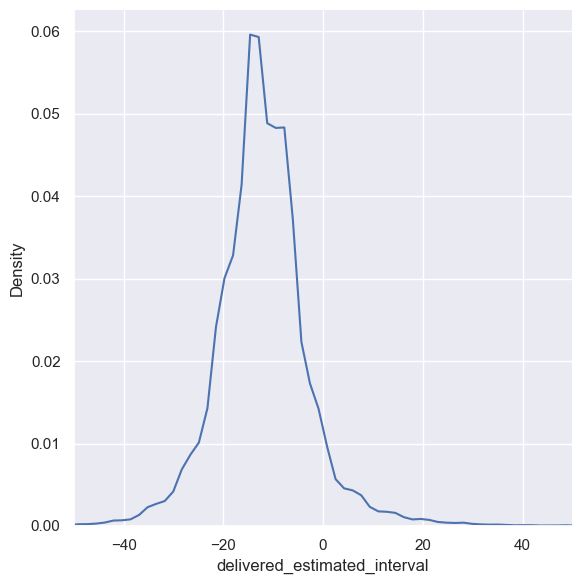

In [89]:
g = sns.displot(x=df['delivered_estimated_interval'].dt.days, kind='kde', height=6)
g.ax.set_xlim(-50, 50);

## Variables qualitatives

In [90]:
# Nombre de valeurs uniques
for col in df.select_dtypes('object'):
    print(f'{col :-<50} {df[col].unique().size}')

order_id------------------------------------------ 94212
customer_unique_id-------------------------------- 91220
product_category_name_english--------------------- 73


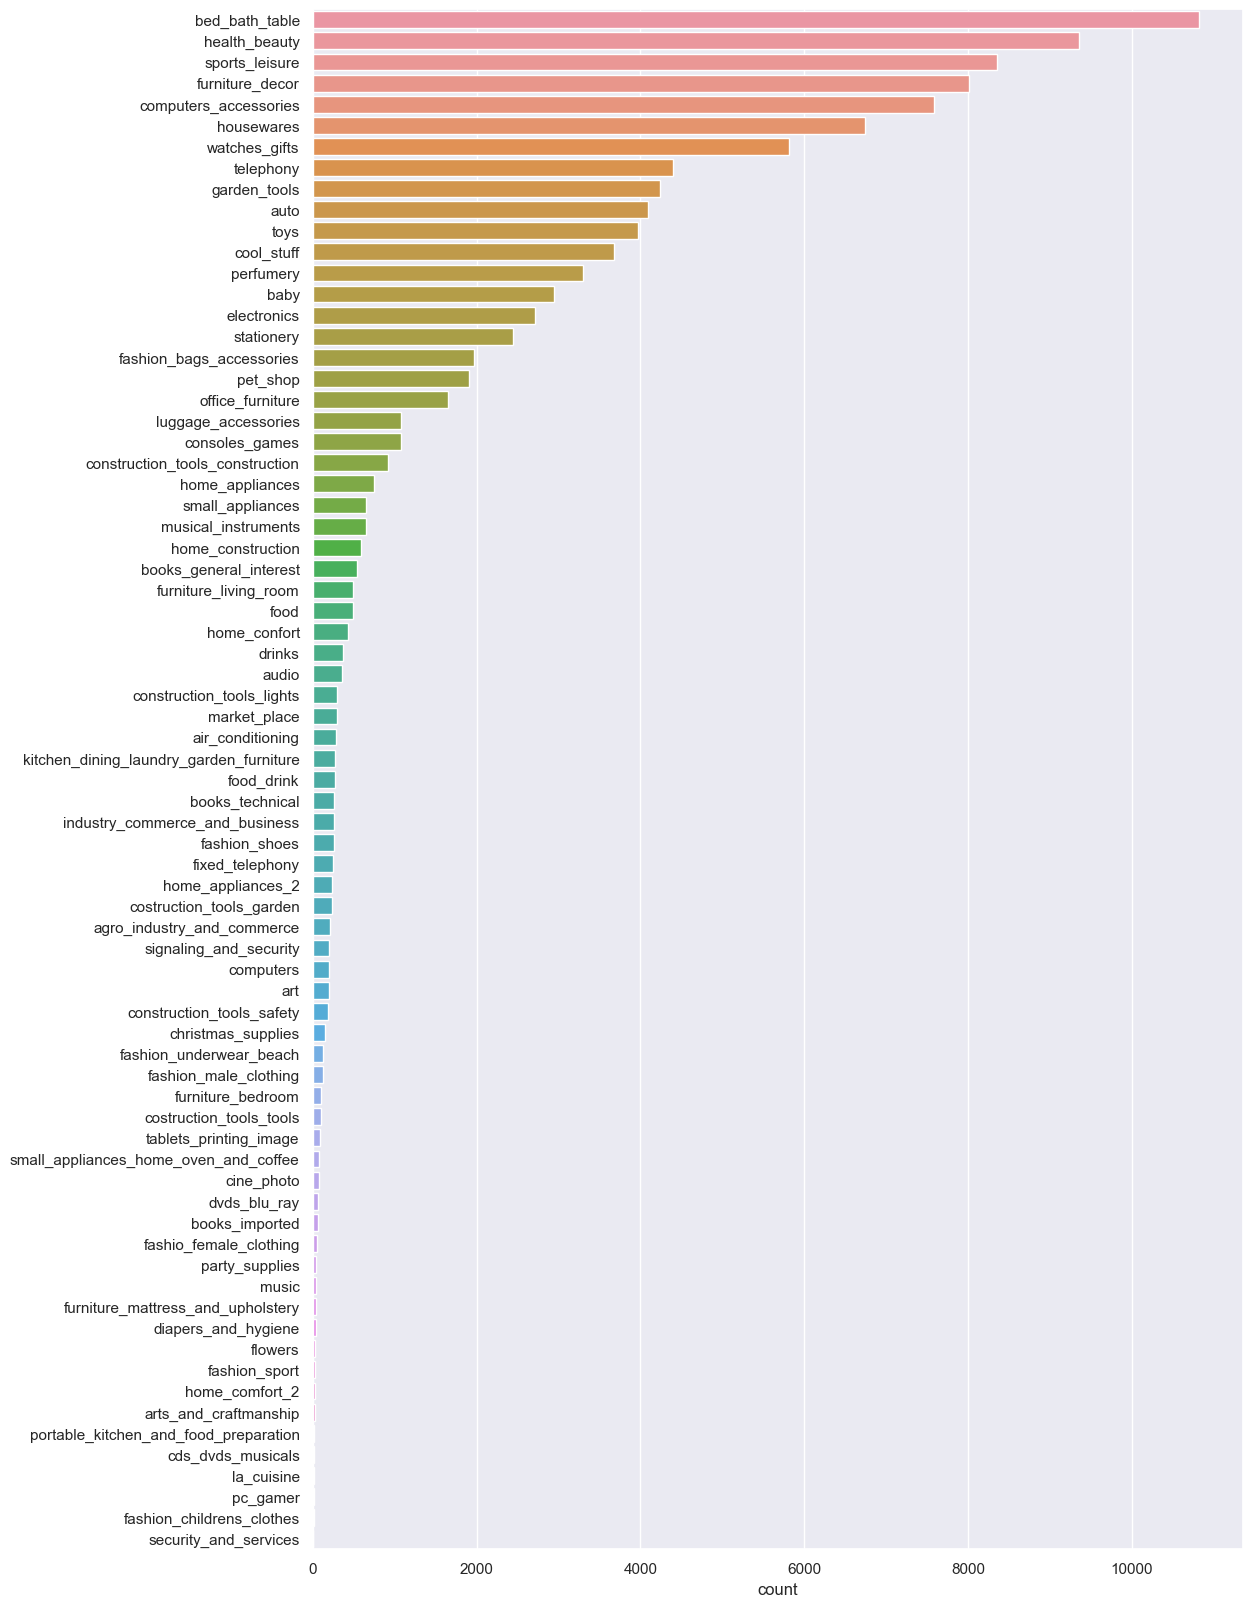

In [91]:
order = df['product_category_name_english'].value_counts().index
plt.figure(figsize=(12,20))
sns.countplot(y=df['product_category_name_english'], order=order)
plt.ylabel('');

# Segmentation RFM

## Récence

In [92]:
df.shape

(107489, 9)

In [93]:
# On trie par ordre croissant de la date d'achat
df_ = df.sort_values(by='order_purchase_timestamp')
print(df_.shape)
df_.head()

(107489, 9)


,order_id,customer_unique_id,order_item_id,order_purchase_timestamp,delivered_estimated_interval,price,freight_value,product_category_name_english,review_score
77809,ce86fa5a5108884726a2244bcae51ae6,d753459418d268407f19b64be28e3c5a,1,2017-01-05,-16 days,10.9,8.72,fashion_bags_accessories,5
70868,e1fe072ef14b519af1f0a8ed997c1301,4b3207464f5f7a48a7f63fa0b1251d86,1,2017-01-05,-34 days,9.9,14.52,furniture_bedroom,5
9922,c96209cd1d43d071d3bdf48d299b7aa5,527cd2850ef91088969ffbef0103dec3,1,2017-01-05,-28 days,11.9,8.72,baby,5
32566,9b91ddcbd6cbceb83d4fd2462ca1f95e,12f5d6e1cbf93dafd9dcc19095df0b3d,1,2017-01-05,-16 days,10.9,8.72,fashion_bags_accessories,5
49116,7004296aa0256632eaddc171edaf727f,29a63a400c3ca9982907ce8de1f19527,1,2017-01-05,-16 days,10.9,8.72,fashion_bags_accessories,5


In [94]:
# One ne garde que la dernière commande de chaque client
df_last = df_.drop_duplicates(subset='customer_unique_id', keep='last')
print(df_last.shape)
df_last.head()

(91220, 9)


,order_id,customer_unique_id,order_item_id,order_purchase_timestamp,delivered_estimated_interval,price,freight_value,product_category_name_english,review_score
70868,e1fe072ef14b519af1f0a8ed997c1301,4b3207464f5f7a48a7f63fa0b1251d86,1,2017-01-05,-34 days,9.9,14.52,furniture_bedroom,5
9922,c96209cd1d43d071d3bdf48d299b7aa5,527cd2850ef91088969ffbef0103dec3,1,2017-01-05,-28 days,11.9,8.72,baby,5
49116,7004296aa0256632eaddc171edaf727f,29a63a400c3ca9982907ce8de1f19527,1,2017-01-05,-16 days,10.9,8.72,fashion_bags_accessories,5
73613,5965b589a33443dd1f820eb7df39762a,b6b2c3c8fd76769b478618a3c2505009,1,2017-01-05,-16 days,10.9,8.72,fashion_bags_accessories,5
113817,f175d67589e059cbbda956f10f0702e6,f7be9bec658c62ab6240b44cd26c0b84,1,2017-01-05,-27 days,9.9,8.72,furniture_bedroom,5


In [95]:
# On a autant de lignes de que de clients différents
df['customer_unique_id'].unique().size

91220

In [96]:
# On définit la DataFrame 'recence' qui va contenir les dates d'achat
recence = df_last[['customer_unique_id', 'order_purchase_timestamp']]
recence.head()

,customer_unique_id,order_purchase_timestamp
70868,4b3207464f5f7a48a7f63fa0b1251d86,2017-01-05
9922,527cd2850ef91088969ffbef0103dec3,2017-01-05
49116,29a63a400c3ca9982907ce8de1f19527,2017-01-05
73613,b6b2c3c8fd76769b478618a3c2505009,2017-01-05
113817,f7be9bec658c62ab6240b44cd26c0b84,2017-01-05


On va définir la récence comme le nombre de jours écoulés depuis la dernière commande

In [97]:
s = recence['order_purchase_timestamp']
recence['recency'] = s.max() - s
recence['recency'] = recence['recency'].dt.days
recence = recence.drop(columns=['order_purchase_timestamp'])
recence.head()

<ipython-input-97-d291c5a3a0c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recence['recency'] = s.max() - s
<ipython-input-97-d291c5a3a0c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recence['recency'] = recence['recency'].dt.days


,customer_unique_id,recency
70868,4b3207464f5f7a48a7f63fa0b1251d86,601
9922,527cd2850ef91088969ffbef0103dec3,601
49116,29a63a400c3ca9982907ce8de1f19527,601
73613,b6b2c3c8fd76769b478618a3c2505009,601
113817,f7be9bec658c62ab6240b44cd26c0b84,601


## Fréquence

On va définir la fréquence comme étant le nombre de fois qu'un client a fait une commande (pour rappel, une commande peut contenir plusieurs articles, le nombre de lignes pour un client donné ne correspond donc pas forcément au nombre de commandes qu'il a fait)

In [98]:
# On supprime les doublons sur la colonne 'order_id' pour ne garder qu'une ligne par commande
df_ = df.drop_duplicates(subset='order_id')
df_.shape

(94212, 9)

In [99]:
frequence = df_['customer_unique_id'].value_counts().reset_index()
frequence.columns = ['customer_unique_id', 'frequency']
frequence

,customer_unique_id,frequency
0,8d50f5eadf50201ccdcedfb9e2ac8455,14
1,3e43e6105506432c953e165fb2acf44c,9
2,6469f99c1f9dfae7733b25662e7f1782,7
3,1b6c7548a2a1f9037c1fd3ddfed95f33,7
4,ca77025e7201e3b30c44b472ff346268,7
...,...,...
91215,075a5615f6bb67b7a4704a98e15d9c5c,1
91216,0b49bcd246aa9725adb7ea86e4fa0ff5,1
91217,9406b09ee310bd556a634c55e6781208,1
91218,e419ea0591aac37591b82b409ccd3d9d,1


## Montant

Pour le montant, on va prendre le prix moyen dépensé par commande

In [100]:
# nombre de commandes par client
n_orders = df.drop_duplicates(subset='order_id', keep='first')['customer_unique_id'].value_counts()
n_orders

8d50f5eadf50201ccdcedfb9e2ac8455    14
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
075a5615f6bb67b7a4704a98e15d9c5c     1
0b49bcd246aa9725adb7ea86e4fa0ff5     1
9406b09ee310bd556a634c55e6781208     1
e419ea0591aac37591b82b409ccd3d9d     1
84732c5050c01db9b23e19ba39899398     1
Name: customer_unique_id, Length: 91220, dtype: int64

In [101]:
# Montant total dépensé par client
sum_price = df.groupby(by='customer_unique_id').sum()['price']
sum_price

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2     129.90
0000b849f77a49e4a4ce2b2a4ca5be3f      18.90
0000f46a3911fa3c0805444483337064      69.00
0000f6ccb0745a6a4b88665a16c9f078      25.99
0004aac84e0df4da2b147fca70cf8255     180.00
                                     ...   
fffcf5a5ff07b0908bd4e2dbc735a684    1570.00
fffea47cd6d3cc0a88bd621562a9d061      64.89
ffff371b4d645b6ecea244b27531430a      89.90
ffff5962728ec6157033ef9805bacc48     115.00
ffffd2657e2aad2907e67c3e9daecbeb      56.99
Name: price, Length: 91220, dtype: float64

In [102]:
montant = sum_price / n_orders
montant = montant.reset_index()
montant.columns = ['customer_unique_id', 'mean_spending']
montant

,customer_unique_id,mean_spending
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
91215,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
91216,fffea47cd6d3cc0a88bd621562a9d061,64.89
91217,ffff371b4d645b6ecea244b27531430a,89.90
91218,ffff5962728ec6157033ef9805bacc48,115.00


On regroupe les 3 variables dans le Dataframe `df_rfm`

In [103]:
df_rfm = pd.merge(recence, frequence)
df_rfm = df_rfm.merge(montant)
df_rfm.set_index(keys='customer_unique_id', inplace=True)
print(df_rfm.shape)
df_rfm.head()

(91220, 3)


,recency,frequency,mean_spending
customer_unique_id,,,
4b3207464f5f7a48a7f63fa0b1251d86,601,1,9.9
527cd2850ef91088969ffbef0103dec3,601,1,11.9
29a63a400c3ca9982907ce8de1f19527,601,1,10.9
b6b2c3c8fd76769b478618a3c2505009,601,1,10.9
f7be9bec658c62ab6240b44cd26c0b84,601,2,10.4


In [104]:
# On sauvegarde le DataFrame au format csv
df_rfm.to_csv('df_rfm.csv')

## Visualtisation

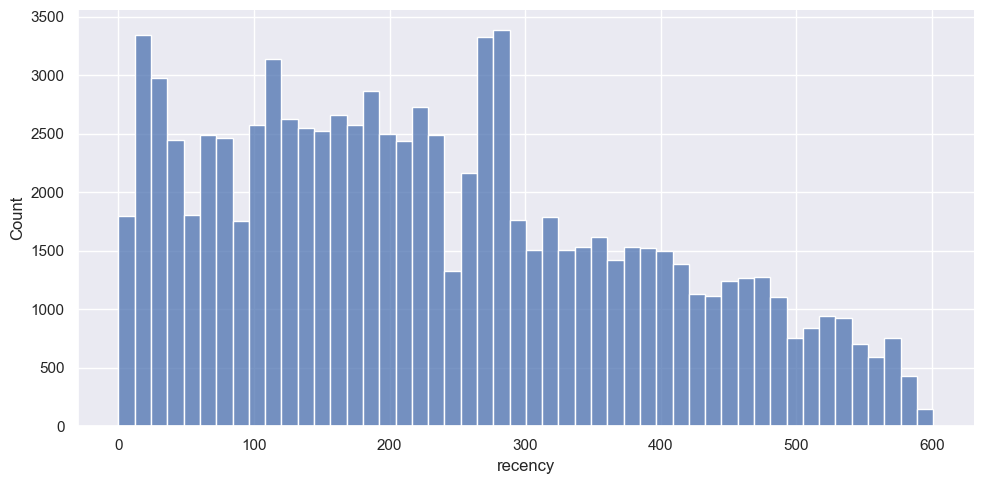

In [105]:
sns.displot(x='recency', data=df_rfm, bins=50, aspect=2);

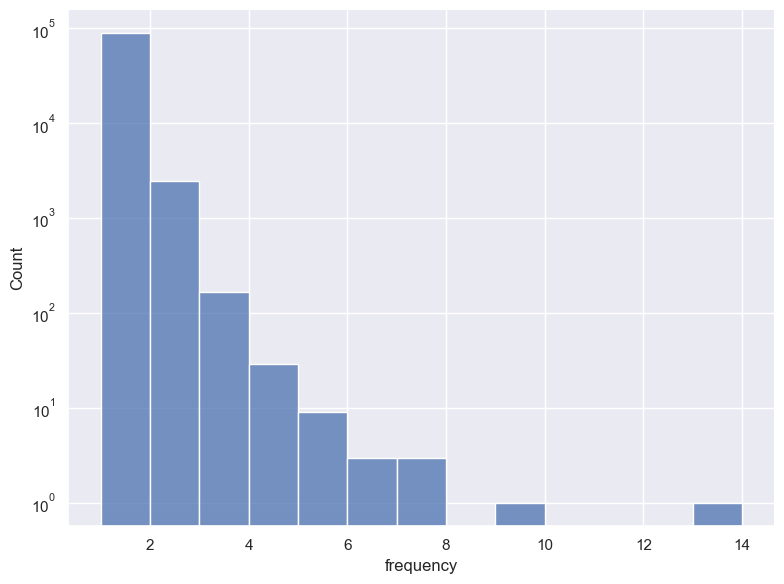

In [106]:
sns.displot(x='frequency', data=df_rfm, binwidth=1, log_scale=(False, True), height=6, aspect=16/12);

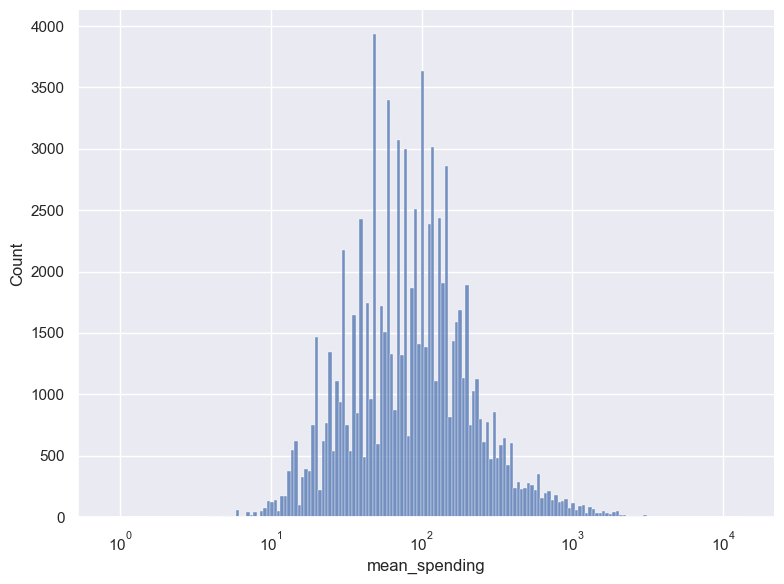

In [107]:
sns.displot(x='mean_spending', data=df_rfm, log_scale=True, height=6, aspect=16/12);

# Segmentation plus avancée

## Review Score

On va rajouter à la segmentation RFM le score attribué par le client

In [108]:
scores = df[['customer_unique_id', 'review_score']]

In [109]:
# Note moyenne attribuée par chaque client
scores = scores.groupby(by='customer_unique_id').mean()
scores.head()

,review_score
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
0000f46a3911fa3c0805444483337064,3.0
0000f6ccb0745a6a4b88665a16c9f078,4.0
0004aac84e0df4da2b147fca70cf8255,5.0


In [110]:
# RFMS avec le S pour 'Score'
df_rfms = df_rfm.join(scores)
df_rfms.head()

,recency,frequency,mean_spending,review_score
customer_unique_id,,,,
4b3207464f5f7a48a7f63fa0b1251d86,601,1,9.9,5.0
527cd2850ef91088969ffbef0103dec3,601,1,11.9,5.0
29a63a400c3ca9982907ce8de1f19527,601,1,10.9,5.0
b6b2c3c8fd76769b478618a3c2505009,601,1,10.9,5.0
f7be9bec658c62ab6240b44cd26c0b84,601,2,10.4,5.0


In [111]:
df_rfms.to_csv('df_rfms.csv')

## Nombre d'article achetés

On rajoute ici le nombre total d'articles commandés par client

In [112]:
# On regroupe par commande et prend la valeur max de la colonne 'order_item_id' pour obtenir le nombre 
# d'articles dans la commande
items_per_order = df[['order_id', 'customer_unique_id', 'order_item_id']].groupby('order_id').max()
items_per_order.head()

,customer_unique_id,order_item_id
order_id,,
00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,1
00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,1
000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,1
00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,1
00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,1


In [113]:
items_per_order.shape

(94212, 2)

In [114]:
# On somme sur la colonne 'customer_unique_id' pour obtenir le nombre d'articles commandés par client
total_items = items_per_order.groupby(by='customer_unique_id').sum()
total_items.columns = ['total_items']
total_items.head()

,total_items
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


In [115]:
df_rfmst = df_rfms.join(total_items)
df_rfmst.head()

,recency,frequency,mean_spending,review_score,total_items
customer_unique_id,,,,,
4b3207464f5f7a48a7f63fa0b1251d86,601,1,9.9,5.0,1
527cd2850ef91088969ffbef0103dec3,601,1,11.9,5.0,1
29a63a400c3ca9982907ce8de1f19527,601,1,10.9,5.0,1
b6b2c3c8fd76769b478618a3c2505009,601,1,10.9,5.0,1
f7be9bec658c62ab6240b44cd26c0b84,601,2,10.4,5.0,2


In [116]:
# Récence - Fréquence - Montant - Score - Total des articles
df_rfmst.to_csv('df_rfmst.csv')

## Nombre d'articles par commandes

Cette fois, plutôt que de prendre le nombre total d'articles, on va prendre le nombre d'articles par commande par client

In [117]:
items_per_order_client = items_per_order.groupby(by='customer_unique_id').mean()
items_per_order_client.columns = ['items_per_order']
items_per_order_client['items_per_order'] = items_per_order_client['items_per_order'].astype('int') # on arrondie
items_per_order_client.head()

,items_per_order
customer_unique_id,
0000366f3b9a7992bf8c76cfdf3221e2,1
0000b849f77a49e4a4ce2b2a4ca5be3f,1
0000f46a3911fa3c0805444483337064,1
0000f6ccb0745a6a4b88665a16c9f078,1
0004aac84e0df4da2b147fca70cf8255,1


In [118]:
df_rfmsa = df_rfms.join(items_per_order_client)
df_rfmsa.head()

,recency,frequency,mean_spending,review_score,items_per_order
customer_unique_id,,,,,
4b3207464f5f7a48a7f63fa0b1251d86,601,1,9.9,5.0,1
527cd2850ef91088969ffbef0103dec3,601,1,11.9,5.0,1
29a63a400c3ca9982907ce8de1f19527,601,1,10.9,5.0,1
b6b2c3c8fd76769b478618a3c2505009,601,1,10.9,5.0,1
f7be9bec658c62ab6240b44cd26c0b84,601,2,10.4,5.0,1


In [119]:
# Récence - Fréquence - Montant - Score - Articles par commande
df_rfmsa.to_csv('df_rfmsa.csv')

In [120]:
df['order_purchase_timestamp'].max()

Timestamp('2018-08-29 00:00:00')